In [1]:
import numpy as np

In [2]:
from utils_graph_generation import load_graph, get_paths
from utils_graph_metrics import get_exp, calc_pdf_points, calc_cdf_points, calc_ccdf_points
from utils_graph_plot import plot_degree_distribution, plot_degree_probability_distribution, plot_degree_cummulative_distribution, plot_degree_complementary_cummulative_distribution, plot_yerali

# Distribución de grados
Dado un grafo muestra tres gráficas:
* Un histograma con la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con el acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con la inversa del acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo

In [40]:
# Dado un nombre de grafo, imprime las gráficas relativas a las distribuciones de grados de los nodos
def calc_plot_degree_distributions(name_graph, graphs_folder, plots_folder, G=None, normalize = False):
    if G is None:
        G = load_graph(name_graph, graphs_folder)

    # Normalizamos entre el número total de nodos
    points = np.sort(np.array(list(dict(G.degree()).values())).astype(float))
    if normalize:
        points = points/float(G.number_of_nodes())
    print(points)
    max_bins = points.max()
    if points.min() != 0:
        min_bins = points.min()
    else:
        if normalize:
            min_bins = 0.001
        else:
            min_bins = 1
    print(min_bins)
    print(max_bins)
    plot_degree_distribution([points], name_graph, plots_folder, min_bins=1, max_bins=300) #, min_bins=min_bins, max_bins=max_bins

    arr_deg_prob = plot_degree_probability_distribution([points], G.number_of_nodes(), name_graph, plots_folder)
    
    arr_deg_cum = plot_degree_cummulative_distribution(arr_deg_prob, name_graph, plots_folder)

    plot_degree_complementary_cummulative_distribution(arr_deg_cum, name_graph, plots_folder)


In [4]:
def calc_yerali(name_graph, graphs_folder, plots_folder, G=None, plfit=True, normalize = False, show_comparative=False, only_ntamas=False):
    G = load_graph(name_graph, graphs_folder)

    # Normalizamos entre el número total de nodos
    points = np.sort(np.array(list(dict(G.degree()).values())).astype(float))
    plfit = get_exp([points], name_graph, show_comparative=show_comparative, only_ntamas=only_ntamas)

    arr_pdf_points = calc_pdf_points([points], G.number_of_nodes())

    arr_cdf_points = calc_cdf_points(arr_pdf_points)

    arr_ccdf_points = calc_ccdf_points(arr_cdf_points)

    plot_yerali(arr_pdf_points, arr_ccdf_points, plfit)

Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   2.   2.   2.
   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2.   2. 

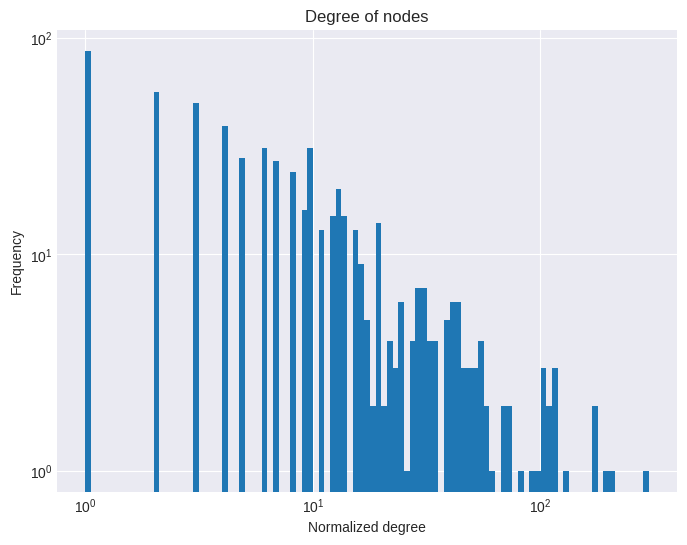

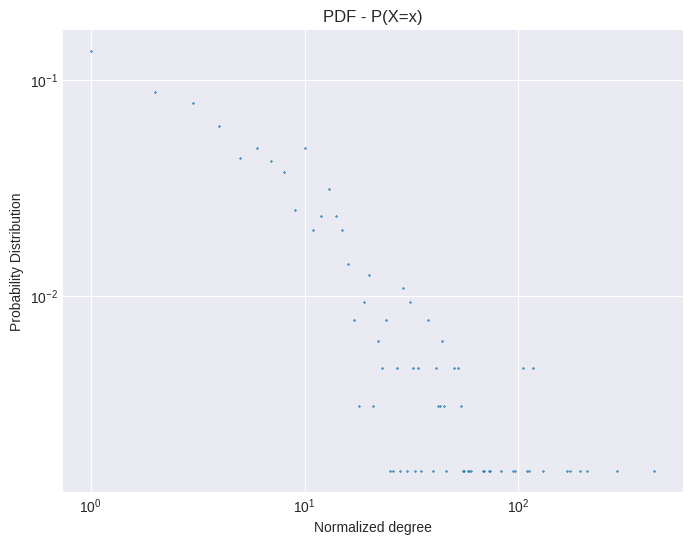

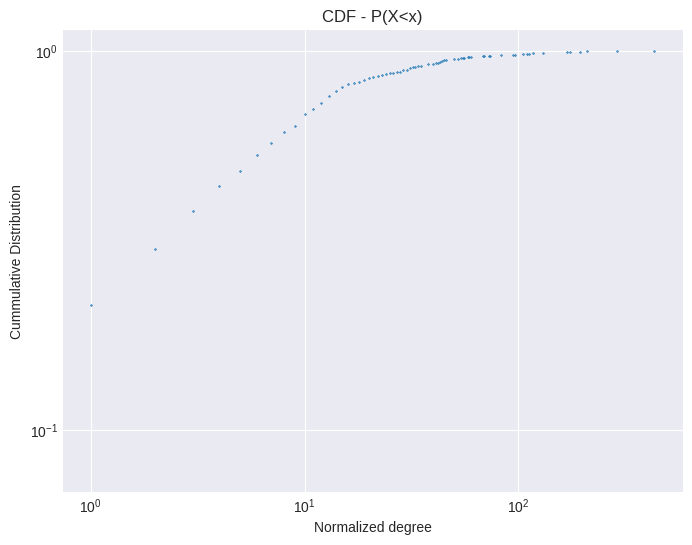

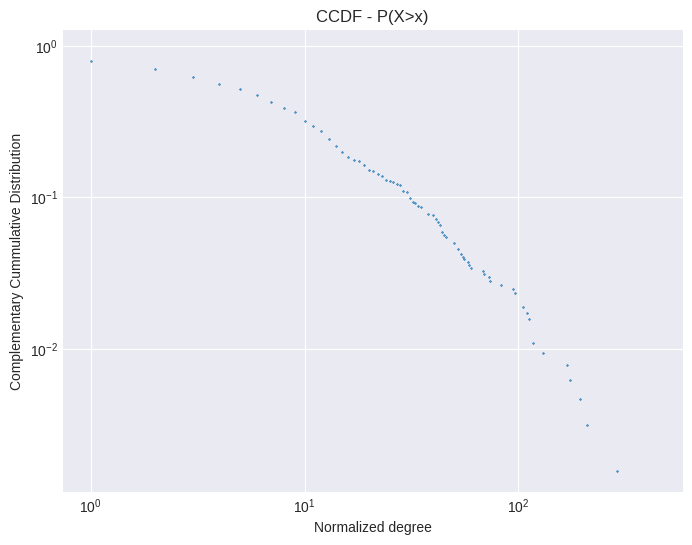

Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470
Calculating best minimal value for power law fit
xmin progress: 98%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 2.1930724612278993
sigma: 0.07545652782206182
x_min: 9.0
(Kolgomorov Smirnov) D: 0.06040966884865273


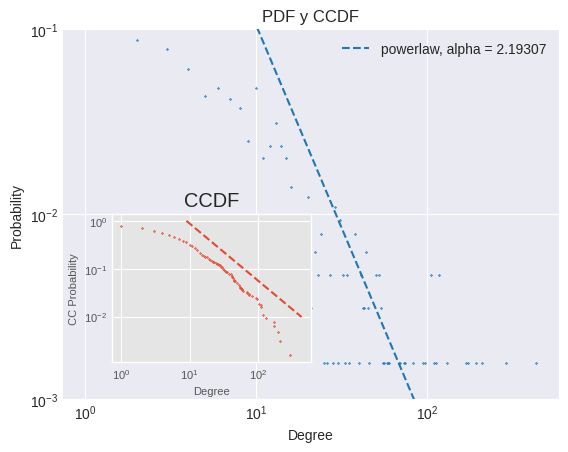

In [52]:
MODE = "hashtag"

MANIFESTACION = "nat"
hora = "429624"

MANIFESTACION = "9n"
hora = "437037"

graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="degree")

calc_plot_degree_distributions(hora, graphs_folder, plots_folder, normalize=False)
calc_yerali(hora, graphs_folder, plots_folder, plfit=True, normalize=False, show_comparative=False, only_ntamas=False)


In [43]:
from utils_graph_metrics import tresh_normalization

In [50]:
def calc_plot_degree_distributions_tres(name_graph, graphs_folder, plots_folder, G=None, arr_kt_plot=[5, 10, 20, 50, 100, 150, 200, 250]):
    
    # Cargamos el grafo inicial
    if G is None:
        G = load_graph(name_graph, graphs_folder)
    import networkx as nx
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    print("Numero de nodos de la component conexa", G0.number_of_nodes(), "y de aristas", G0.number_of_edges())
    arr_points = []
    for kt in arr_kt_plot:
        F = tresh_normalization(G, kt)
        points_kt = np.sort(np.array(list(dict(F.degree()).values())).astype(float)/float(G.number_of_nodes()))
        arr_points.append(points_kt)

    get_exp(arr_points, name_graph, show_comparative=False, arr_kt=arr_kt_plot)
    
    plot_degree_distribution(arr_points, name_graph, plots_folder, arr_kt_plot=arr_kt_plot, alpha=0.45)

    arr_deg_prob = plot_degree_probability_distribution(arr_points, G.number_of_nodes(), name_graph, plots_folder, arr_kt_plot=arr_kt_plot)
    
    arr_deg_cum = plot_degree_cummulative_distribution(arr_deg_prob, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

    plot_degree_complementary_cummulative_distribution(arr_deg_cum, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470
Numero de nodos de la component conexa 538 y de aristas 4426
Calculating best minimal value for power law fit
xmin progress: 98%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 2.1930724612278993
sigma: 0.07545652782206182
x_min: 0.014018691588785047
(Kolgomorov Smirnov) D: 0.06040966884865273
Calculating best minimal value for power law fit
xmin progress: 98%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 2.2910760108453867
sigma: 0.08476329276743409
x_min: 0.01557632398753894
(Kolgomorov Smirnov) D: 0.06723857218008389
Calculating best minimal value for power law fit
xmin progress: 98%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 2.265804670862348
sigma: 0.09111461394579853
x_min: 0.017133956386292833
(Kolgomorov Smirnov) D: 0.07255058982196816
Calculating best minimal value 

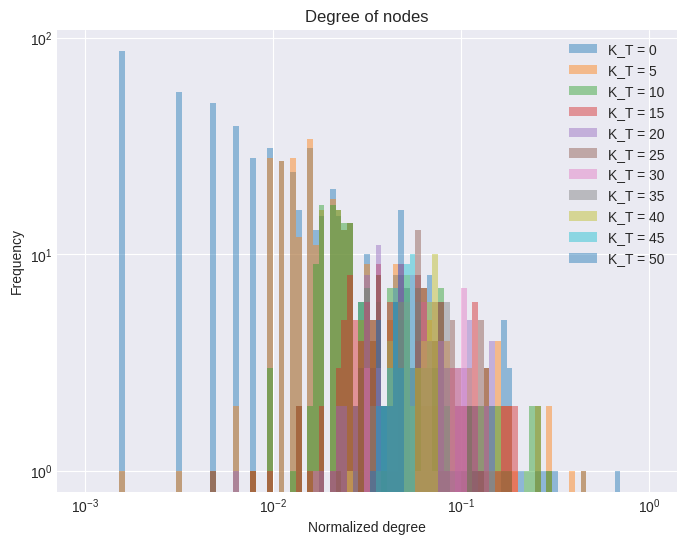

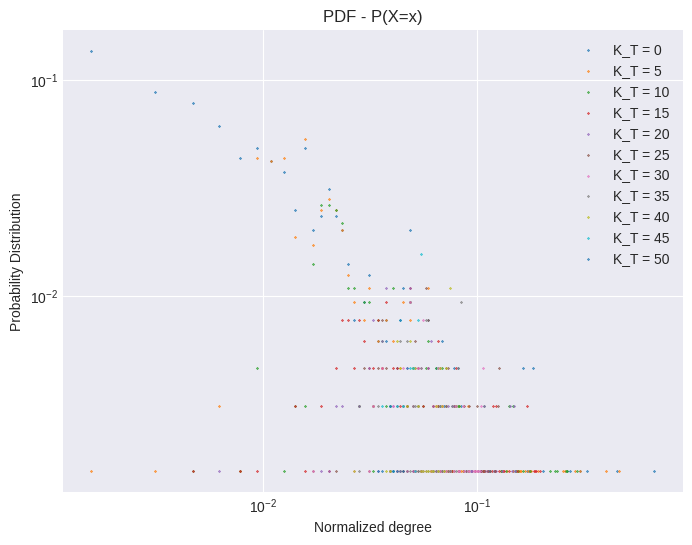

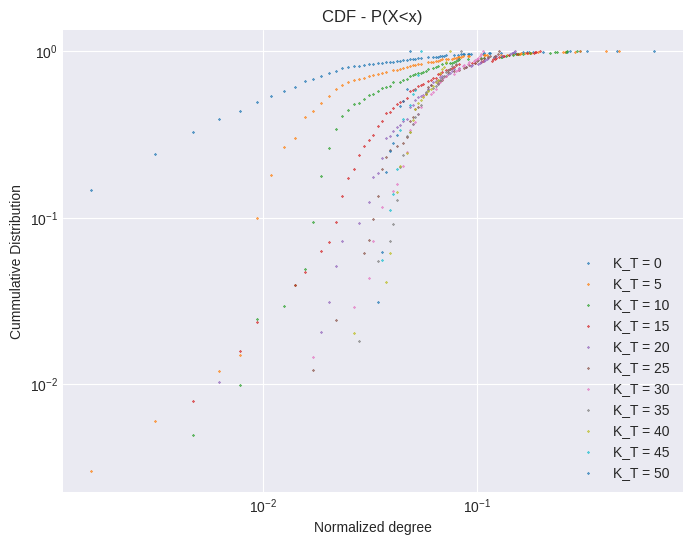

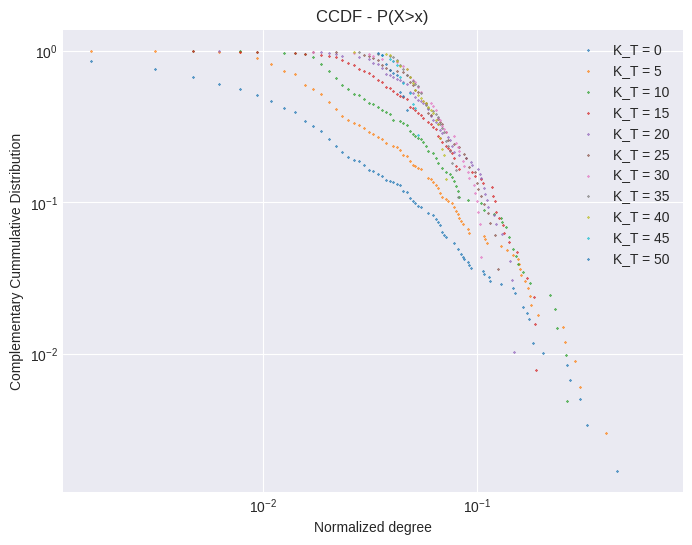

In [53]:
graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="degree")

calc_plot_degree_distributions_tres(hora, graphs_folder, plots_folder, arr_kt_plot=[0,5,10,15,20,25,30,35,40,45,50])